# Calculate Moving Average in Pandas DataFrame

Moving Average calculates the average of data over some periods

In [27]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

plt.style.use('default')
%matplotlib inline

In [28]:
reliance = pd.read_csv(r'C:\Users\bukab\OneDrive\Desktop\DA-Tutorials\Moving Average\RELIANCE.NS_.csv', index_col='Date',
                       parse_dates=True)
reliance.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-21,507.192322,507.687622,497.781525,498.450195,485.688568,3097170.0
2016-07-22,498.276825,504.121429,497.831055,502.660278,489.790863,3184126.0
2016-07-25,502.239258,507.068512,498.945496,506.573181,493.603546,3803482.0
2016-07-26,506.697021,512.541626,502.833649,507.217102,494.231049,4853316.0
2016-07-27,506.721771,508.182922,499.737976,501.793488,488.946259,5090697.0


___

### Calculating the Simple Moving Average (SMA)

* SMA is the most basic type of moving average. It is calculated by taking the arithmetic mean of a certain number of data points over a specified period.
* For example, to calculate a 10-day SMA, you would add up the closing prices of the last 10 days and divide by 10.

In [29]:
# extracting columns
# extract 'Close' column and convert to DataFrame
reliance = reliance['Close'].to_frame()

# calculate 30 day simple moving average
reliance['SMA30'] = reliance['Close'].rolling(30).mean()

# remove null values
reliance_updated = reliance.dropna()

reliance_updated

,Close,SMA30
Date,,
2016-09-01,509.767914,505.689072
2016-09-02,501.917328,505.804643
2016-09-06,505.161560,505.888019
2016-09-07,504.047150,505.803818
2016-09-08,511.848175,505.958187
...,...,...
2021-07-14,2086.000000,2160.583325
2021-07-15,2082.350098,2156.339998
2021-07-16,2112.399902,2153.736662


<Axes: xlabel='Date'>

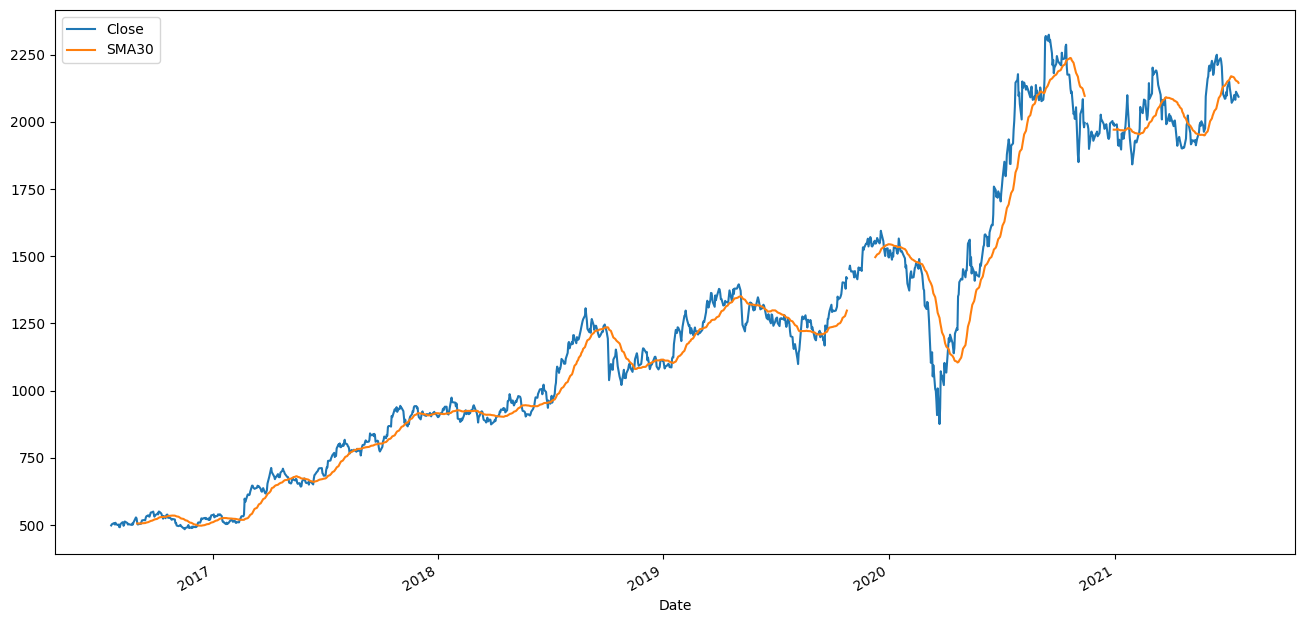

In [30]:
# plotting simple moving average
reliance[['Close', 'SMA30']].plot(label='RELIANCE', figsize=(16,8))

___

### Calculating the Cumulative Moving Average (CMA)

* CMA is similar to SMA but with a slight difference in calculation. Instead of recalculating the average of the entire dataset each time, CMA uses a cumulative approach.
* To calculate the CMA for the nth data point, you add the nth value to the previous average and divide by (n+1). This way, each new data point contributes incrementally to the moving average.

In [31]:
# extracting columns
# extract 'Close' column and convert to DataFrame
reliance = reliance['Close'].to_frame()

# calculate 30 day simple moving average
reliance['CMA30'] = reliance['Close'].expanding().mean()

reliance

,Close,CMA30
Date,,
2016-07-21,498.450195,498.450195
2016-07-22,502.660278,500.555236
2016-07-25,506.573181,502.561218
2016-07-26,507.217102,503.725189
2016-07-27,501.793488,503.338849
...,...,...
2021-07-14,2086.000000,1232.000327
2021-07-15,2082.350098,1232.692231
2021-07-16,2112.399902,1233.407440


<Axes: xlabel='Date'>

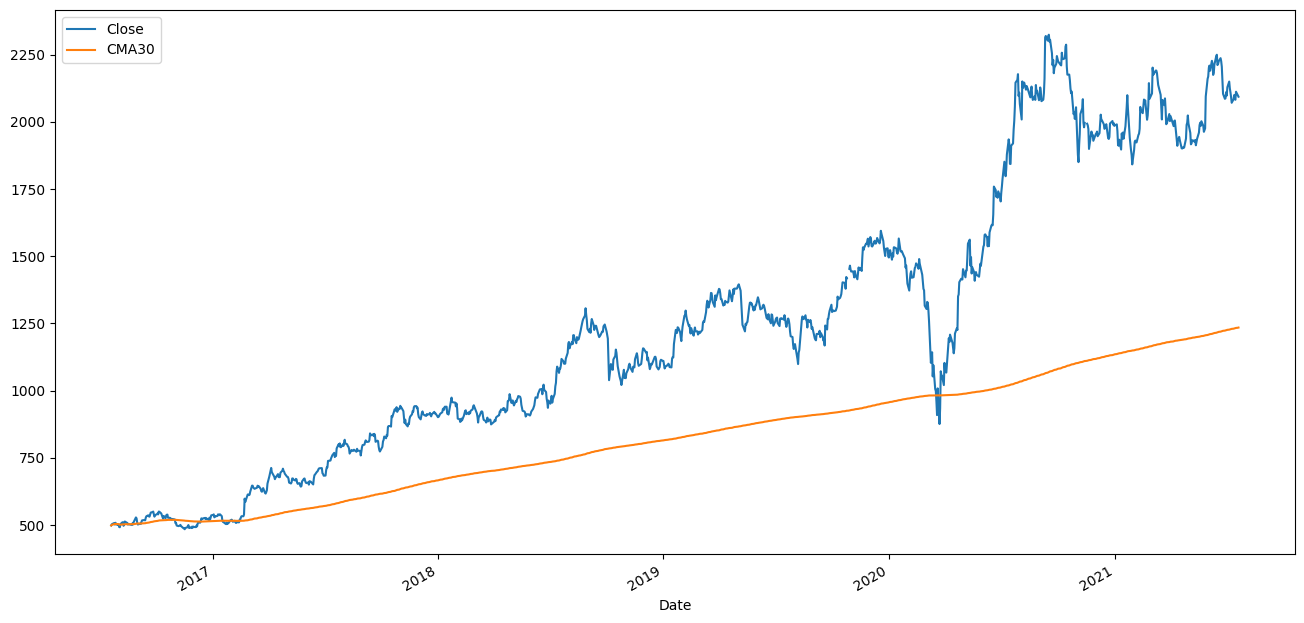

In [32]:
# plotting the cumulative moving averages
reliance[['Close', 'CMA30']].plot(label='RELIANCE', figsize=(16,8))

___

### Calculating the Exponential Moving Average (EMA)

* EMA is a more advanced type of moving average that gives more weight to recent data points, making it more responsive to price changes compared to SMA or CMA.
* EMA is calculated using a formula that applies more weight to the most recent data points while still considering older data. The weighting decreases exponentially as you move backward in time.
* The formula for calculating EMA involves multiplying the previous EMA by a smoothing factor (usually derived from the time period) and adding the latest data point multiplied by the complement of the smoothing factor.
* EMA reacts more quickly to price changes, which can be advantageous for traders looking to capture short-term trends.


In [33]:
# extracting columns
# extract 'Close' column and convert to DataFrame
reliance = reliance['Close'].to_frame()

# calculate 30 day simple moving average
reliance['EWMA30'] = reliance['Close'].ewm(span=30).mean()


reliance

,Close,EWMA30
Date,,
2016-07-21,498.450195,498.450195
2016-07-22,502.660278,500.625405
2016-07-25,506.573181,502.741589
2016-07-26,507.217102,503.974756
2016-07-27,501.793488,503.478464
...,...,...
2021-07-14,2086.000000,2117.638763
2021-07-15,2082.350098,2115.362072
2021-07-16,2112.399902,2115.170964


<Axes: xlabel='Date'>

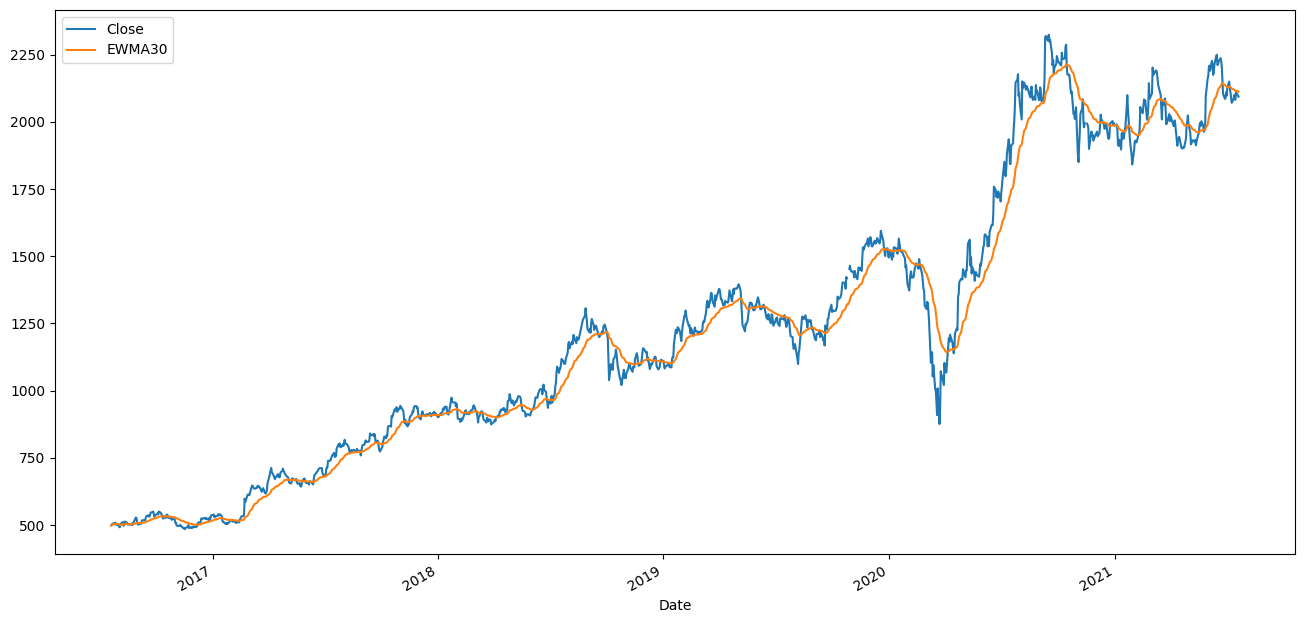

In [34]:
reliance[['Close', 'EWMA30']].plot(label='RELIANCE', figsize=(16,8))